In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [ ]:
df = pd.read_csv("26-customer_data.csv")

In [3]:
df.head()

,Annual_Income,Spending_Score
0,-5.772478,-4.818216
1,6.768246,-5.424570
2,5.796159,-6.239967
3,7.096022,-5.272612
4,-5.725561,-9.316889


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Annual_Income   1499 non-null   float64
 1   Spending_Score  1499 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


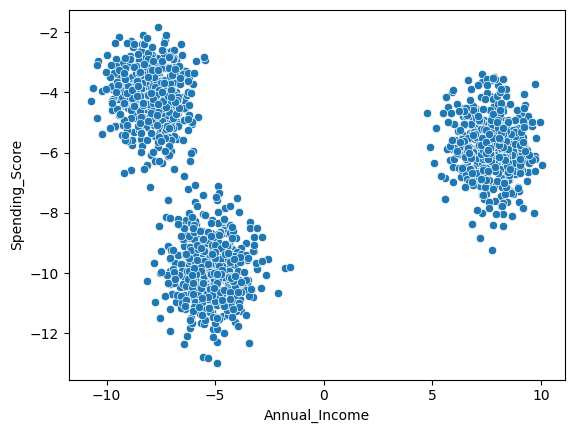

In [5]:
sns.scatterplot(data = df, x = "Annual_Income", y = "Spending_Score")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=15)

In [7]:
X_train

,Annual_Income,Spending_Score
258,7.809992,-5.031123
195,7.769519,-6.059915
817,-8.529586,-4.853877
820,-5.765759,-9.822013
716,-7.932068,-4.882406
...,...,...
667,-6.734875,-5.107626
156,-8.236823,-3.127431
384,-7.744180,-3.563590
645,-6.151325,-9.263209


In [8]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
wcss = []
for k in range(1,11): 
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[196.92068784710153,
 68.44836482219307,
 11.697030239519936,
 9.903094841612722,
 7.809555505960281,
 7.305994282672236,
 5.54464950970015,
 4.924262623301045,
 4.40928346927015,
 4.2333093798174986]

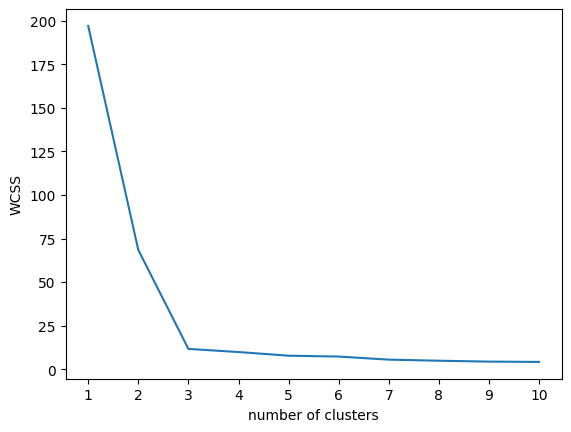

In [14]:
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3)

In [16]:
y_pred = kmeans.predict(X_test_scaled)

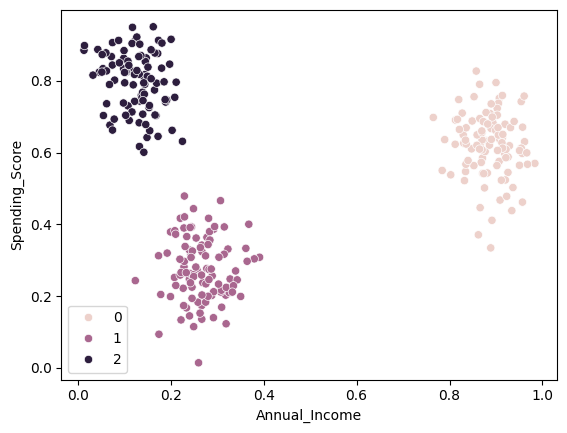

In [17]:
sns.scatterplot(data = pd.DataFrame(X_test_scaled, columns=X_test.columns), x = "Annual_Income", y = "Spending_Score", hue = y_pred)
plt.show()

In [18]:
!pip install kneed

In [19]:
from kneed import KneeLocator

In [23]:
kl = KneeLocator(range(1,11), wcss, curve = "convex", direction="decreasing")

In [24]:
kl.elbow

np.int64(3)

In [25]:
# silhoutte score

In [26]:
from sklearn.metrics import silhouette_score 

In [28]:
silhoutte_scores = []
for k in range(2,11): 
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhoutte_scores.append(score)

In [29]:
silhoutte_scores

[np.float64(0.6538372460771634),
 np.float64(0.7856941696336582),
 np.float64(0.6400208011797931),
 np.float64(0.5096019402368656),
 np.float64(0.39464711741379893),
 np.float64(0.36951255805022565),
 np.float64(0.35139560761864636),
 np.float64(0.3612985582272833),
 np.float64(0.3414068416533773)]

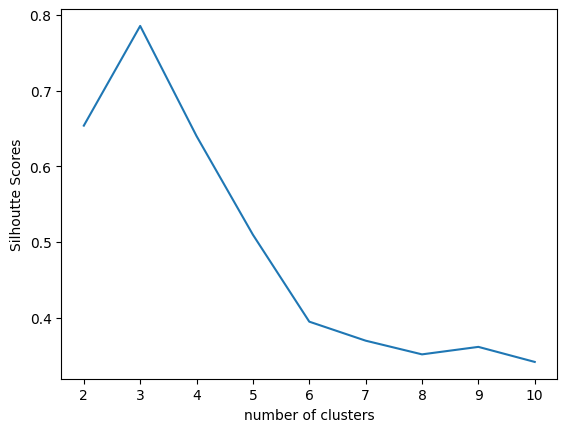

In [30]:
plt.plot(range(2,11), silhoutte_scores)
plt.xticks(range(2,11))
plt.xlabel("number of clusters")
plt.ylabel("Silhoutte Scores")
plt.show()